In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


#loading data

dataset=load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# Data Cleanup

df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list:ast.literal_eval(skill_list)if pd.notna(skill_list) else skill_list)



c:\Users\Pratyaksh\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_da_us= df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

In [3]:
df_da_us= df_da_us.dropna(subset='salary_year_avg')

In [4]:
df_da_us['salary_year_avg'].sample(10)

218151     75000.0
110226     83243.0
659737     90000.0
12530      52500.0
612427    100000.0
432978     90000.0
294721    140000.0
267298    115000.0
190423    101821.5
682558    120040.0
Name: salary_year_avg, dtype: float64

<Axes: >

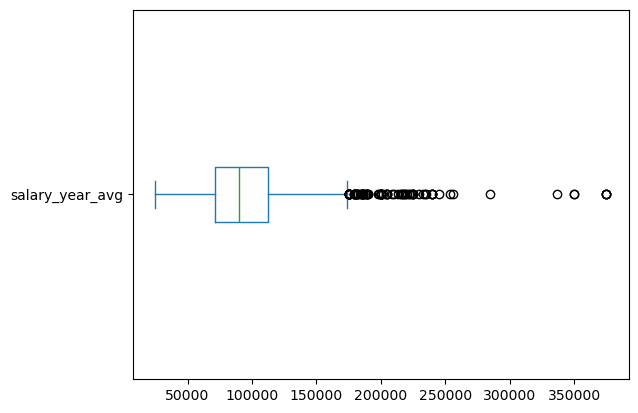

In [7]:
df_da_us['salary_year_avg'].plot(kind='box',vert=False)

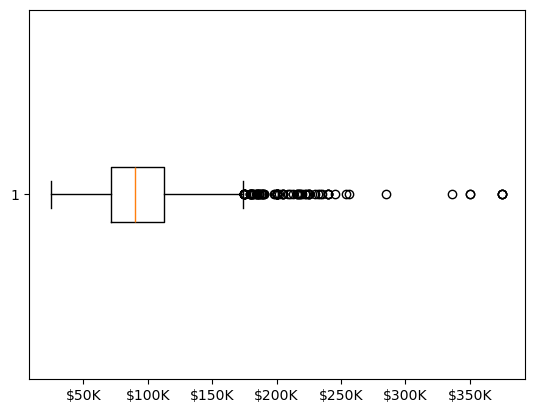

In [11]:
plt.boxplot(df_da_us['salary_year_avg'],vert=False)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f"${int(x/1000):.0f}K"))

In [12]:
job_titles=['Data Analyst','Data Scientist','Data Engineer']

df_us=df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()

In [21]:
df_us=df_us.dropna(subset='salary_year_avg')

In [22]:
job_list=[df_us[df_us['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]


In [ ]:
plt.boxplot(job_list,label=job_titles,vert=False)

In [16]:
df_us['job_title_short'].value_counts()

job_title_short
Data Scientist    4553
Data Analyst      4350
Data Engineer     2915
Name: count, dtype: int64

In [23]:
job_list

[109        89000.0
 180        90250.0
 410       133285.0
 988        62623.0
 1413       71300.0
             ...   
 782637     70000.0
 782798    111175.0
 783588    125000.0
 783866    115000.0
 784882     87500.0
 Name: salary_year_avg, Length: 4350, dtype: float64,
 100       228222.0
 116       114000.0
 257       103128.0
 450       157500.0
 1257       70700.0
             ...   
 785324    234500.0
 785488    115000.0
 785563    136400.0
 785648    221875.0
 785692    157500.0
 Name: salary_year_avg, Length: 4553, dtype: float64,
 92        120000.0
 146       129500.0
 307       185000.0
 339       195000.0
 380        97500.0
             ...   
 783111    125000.0
 784102     90000.0
 784191    217500.0
 785624    139216.0
 785641    150000.0
 Name: salary_year_avg, Length: 2915, dtype: float64]

C:\Users\Pratyaksh\AppData\Local\Temp\ipykernel_19940\3324860777.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list,labels=job_titles,vert=False)


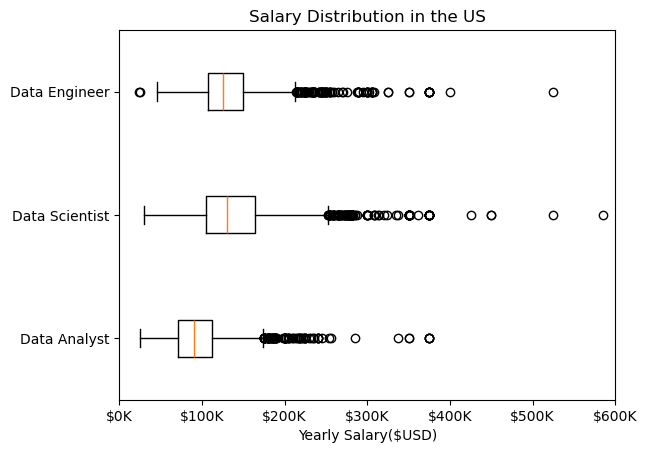

In [30]:
plt.boxplot(job_list,labels=job_titles,vert=False)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f"${int(x/1000)}K"))
plt.xlim(0,600000)
plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary($USD)')
plt.show()